In [19]:
import sys
import torch
import ot

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../lib")
from distributions import sampleWrappedNormal
from utils_hyperbolic import *
from hsw import hyper_sliced_wasserstein
from hhsw import horo_hyper_sliced_wasserstein_lorentz, horo_hyper_sliced_wasserstein_poincare
from sw import sliced_wasserstein
from utility import *

device = "cuda" if torch.cuda.is_available() else "cpu"

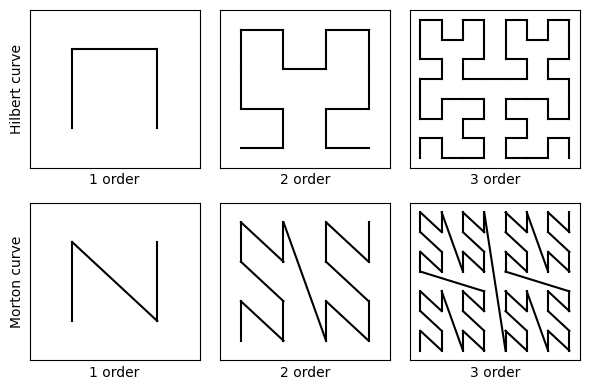

In [5]:
import base


plt.figure(dpi=100,figsize=(6,4))

plt.subplot(2,3,1)
n = 2
X = np.zeros((n**2,2))
for i in range(n):
    for j in range(n):
        X[i*n+j,0] = i
        X[i*n+j,1] = j

X = (X+0.5)/2**(n/2)

id = base.hilbert_order(X)
for k in range(n**2-1):
    x1 = np.array([X[id[k],0], X[id[k+1],0]])
    x2 = np.array([X[id[k],1], X[id[k+1],1]])
    plt.plot(x1,x2,c="k")   

plt.xticks([])
plt.yticks([])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("1 order")
plt.ylabel("Hilbert curve")

plt.subplot(2,3,2)
n = 4
X = np.zeros((n**2,2))
for i in range(n):
    for j in range(n):
        X[i*n+j,0] = i
        X[i*n+j,1] = j

X = (X+0.5)/2**(n/2)

id = base.hilbert_order(X)
for k in range(n**2-1):
    x1 = np.array([X[id[k],0], X[id[k+1],0]])
    x2 = np.array([X[id[k],1], X[id[k+1],1]])
    plt.plot(x1,x2,c="k")   

plt.xticks([])
plt.yticks([])
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("2 order")


plt.subplot(2,3,3)
n = 8
X = np.zeros((n**2,2))
for i in range(n):
    for j in range(n):
        X[i*n+j,0] = i
        X[i*n+j,1] = j

X = (X+0.5)/2**(3)

id = base.hilbert_order(X)
for k in range(n**2-1):
    x1 = np.array([X[id[k],0], X[id[k+1],0]])
    x2 = np.array([X[id[k],1], X[id[k+1],1]])
    plt.plot(x1,x2,c="k")   

plt.xticks([])
plt.yticks([])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("3 order")



plt.subplot(2,3,4)
n = 2
X = np.zeros((n**2,2))
for i in range(n):
    for j in range(n):
        X[i*n+j,0] = i
        X[i*n+j,1] = j

X = (X+0.5)/2**(n/2)

id = base.morton_order(X)
for k in range(n**2-1):
    x1 = np.array([X[id[k],0], X[id[k+1],0]])
    x2 = np.array([X[id[k],1], X[id[k+1],1]])
    plt.plot(x1,x2,c="k")   

plt.xticks([])
plt.yticks([])
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("1 order")
plt.ylabel("Morton curve")

plt.subplot(2,3,5)
n = 4
X = np.zeros((n**2,2))
for i in range(n):
    for j in range(n):
        X[i*n+j,0] = i
        X[i*n+j,1] = j

X = (X+0.5)/2**(n/2)

id = base.morton_order(X)
for k in range(n**2-1):
    x1 = np.array([X[id[k],0], X[id[k+1],0]])
    x2 = np.array([X[id[k],1], X[id[k+1],1]])
    plt.plot(x1,x2,c="k")   

plt.xticks([])
plt.yticks([])
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("2 order")

plt.subplot(2,3,6)
n = 8
X = np.zeros((n**2,2))
for i in range(n):
    for j in range(n):
        X[i*n+j,0] = i
        X[i*n+j,1] = j

X = (X+0.5)/2**(3)

id = base.morton_order(X)
for k in range(n**2-1):
    x1 = np.array([X[id[k],0], X[id[k+1],0]])
    x2 = np.array([X[id[k],1], X[id[k+1],1]])
    plt.plot(x1,x2,c="k")   

plt.xticks([])
plt.yticks([])
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("3 order")
plt.tight_layout()
# plt.savefig("../results/order.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Lorentz Model

In [20]:
mu0 = torch.tensor([1,0,0,0], dtype=torch.float64, device=device)
Sigma0 = torch.eye(3, dtype=torch.float, device=device)


n_try = 10
N = [100,1000,10000,100000]

In [22]:
L_sfw_poincare_morton = np.zeros((len(N), n_try))
L_sfw_lorentz_morton = np.zeros((len(N), n_try))
L_sfw_poincare_hilbert = np.zeros((len(N), n_try))
L_sfw_lorentz_hilbert = np.zeros((len(N), n_try))
i = 0

torch.manual_seed(2023)

for n in N:
    for k in range(n_try):
        x0 = sampleWrappedNormal(mu0, Sigma0, n)
        x1 = sampleWrappedNormal(mu0, Sigma0, n)

        distance = SFW(x0,x1,hyperbolic_model="Lorentz",spf_curve="Mm_l")
        L_sfw_lorentz_morton[i,k] = distance.item()**2

        distance = SFW(x0,x1,hyperbolic_model="Lorentz",spf_curve="Hm_l")
        L_sfw_lorentz_hilbert[i,k] = distance.item()**2

        distance = SFW(x0,x1,hyperbolic_model="Lorentz",spf_curve="Mm_p")
        L_sfw_poincare_morton[i,k] = distance.item()**2

        distance = SFW(x0,x1,hyperbolic_model="Lorentz",spf_curve="Hm_p")
        L_sfw_poincare_hilbert[i,k] = distance.item()**2



    i += 1
    print(i)

1
2
3
4


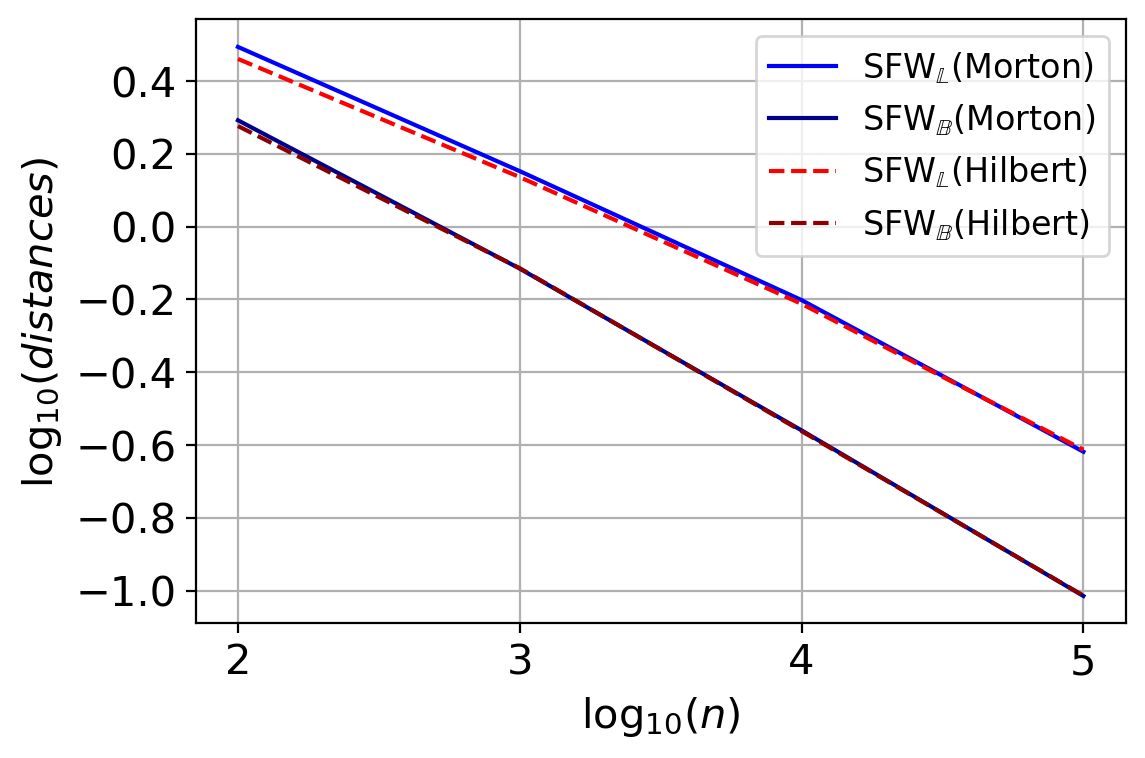

In [24]:
plt.figure(dpi=200)
L_sfw_lorentz_m = np.mean(L_sfw_lorentz_morton,1)
L_sfw_poincare_m = np.mean(L_sfw_poincare_morton,1)
L_sfw_lorentz_h = np.mean(L_sfw_lorentz_hilbert,1)
L_sfw_poincare_h = np.mean(L_sfw_poincare_hilbert,1)

plt.plot(np.log10(np.array(N)),np.log10(L_sfw_lorentz_m),c="b",label=r"SFW$_\mathbb{L}$(Morton)")
plt.plot(np.log10(np.array(N)),np.log10(L_sfw_poincare_m),c="darkblue",label=r"SFW$_\mathbb{B}$(Morton)")
plt.plot(np.log10(np.array(N)),np.log10(L_sfw_lorentz_h),c="r",label=r"SFW$_\mathbb{L}$(Hilbert)",linestyle="dashed")
plt.plot(np.log10(np.array(N)),np.log10(L_sfw_poincare_h),c="darkred",label=r"SFW$_\mathbb{B}$(Hilbert)",linestyle="dashed")
plt.legend(fontsize=12)
plt.xlabel(r"$\log_{10}(n)$", fontsize=15)
plt.ylabel(r"$\log_{10}(distances)$", fontsize=15)

plt.xticks([2,3,4,5],fontsize=15)
plt.yticks(fontsize=15)


plt.grid(True)
plt.savefig("./curve.pdf", format="pdf", bbox_inches="tight")